In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
directory = '../dataset/'
stocks = ['AMD.csv', 'FB.csv', 'TSLA.csv', 'TWTR.csv', 'MONDY.csv']
stocks = [directory + s for s in stocks]
stocks

['../dataset/AMD.csv',
 '../dataset/FB.csv',
 '../dataset/TSLA.csv',
 '../dataset/TWTR.csv',
 '../dataset/MONDY.csv']

In [3]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [4]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

Close_x     Close_y     Close_x    Close_y      Close
0  94.580002  267.570007  880.020020  51.480000  51.790001
1  97.250000  256.839996  811.190002  48.180000  50.840000
2  95.360001  251.089996  849.440002  47.040001  51.549999
3  91.779999  251.639999  854.409973  47.220001  50.630001
4  90.790001  245.639999  845.000000  45.790001  51.939999

In [5]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [6]:
cov_matrix

Close_x   Close_y   Close_x   Close_y     Close
Close_x  0.000726  0.000285  0.000618  0.000497  0.000188
Close_y  0.000285  0.000447  0.000349  0.000311  0.000053
Close_x  0.000618  0.000349  0.001833  0.000399  0.000087
Close_y  0.000497  0.000311  0.000399  0.001440  0.000146
Close    0.000188  0.000053  0.000087  0.000146  0.000403

In [7]:
num_portfolios = 25000
results = np.zeros((3,num_portfolios))

In [8]:
for i in range(num_portfolios):
    weights = np.random.random(cov_matrix.shape[0])
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]

In [9]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

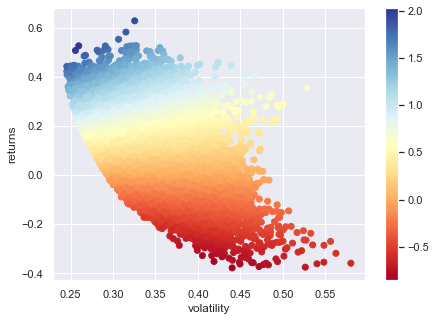

In [10]:
plt.figure(figsize = (7, 5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel('volatility')
plt.ylabel('returns')
plt.show()